In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)

In [43]:
import warnings
warnings.simplefilter(action = "ignore", category = Warning)

In [44]:
df = pd.read_csv("AI_Impact_on_Jobs_2030.csv")

In [45]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [46]:
df.shape

(3000, 18)

In [47]:
df.isnull().sum()

,0
Job_Title,0
Average_Salary,0
Years_Experience,0
Education_Level,0
AI_Exposure_Index,0
Tech_Growth_Factor,0
Automation_Probability_2030,0
Risk_Category,0
Skill_1,0
Skill_2,0


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.dtypes

,0
Job_Title,object
Average_Salary,int64
Years_Experience,int64
Education_Level,object
AI_Exposure_Index,float64
Tech_Growth_Factor,float64
Automation_Probability_2030,float64
Risk_Category,object
Skill_1,float64
Skill_2,float64


In [50]:
df["Job_Title"].value_counts()

,count
Job_Title,
Software Engineer,175
UX Researcher,167
Data Scientist,167
Teacher,166
Graphic Designer,160
HR Specialist,157
Construction Worker,156
Retail Worker,155
Security Guard,154


In [51]:
len(df["Job_Title"].value_counts())

20

In [52]:
df["Education_Level"].value_counts()

,count
Education_Level,
High School,784
Bachelor's,765
Master's,735
PhD,716


In [53]:
df["Risk_Category"].value_counts()

,count
Risk_Category,
Medium,1521
High,740
Low,739


In [54]:
skill_cols = [f"Skill_{i}" for i in range (1, 11)]

In [55]:
skill_cols

['Skill_1',
 'Skill_2',
 'Skill_3',
 'Skill_4',
 'Skill_5',
 'Skill_6',
 'Skill_7',
 'Skill_8',
 'Skill_9',
 'Skill_10']

In [56]:
corr = df[skill_cols].corrwith(df["Automation_Probability_2030"])

In [57]:
most_protective_skill = corr.idxmin()

In [58]:
print(f"Most protective skill: {most_protective_skill}")
print(f"Correlation with automation risk: {corr.min():.3f}")
print("\nAll skill correlations with automation risk:")
print(corr.sort_values())

Most protective skill: Skill_5
Correlation with automation risk: -0.026

All skill correlations with automation risk:
Skill_5    -0.026349
Skill_3    -0.020198
Skill_8    -0.016452
Skill_7    -0.010226
Skill_9     0.001269
Skill_10    0.002665
Skill_4     0.005963
Skill_6     0.011701
Skill_2     0.024247
Skill_1     0.030947
dtype: float64


In [59]:
df["dominant_protective_skill"] = df[skill_cols].idxmax(axis=1)

In [60]:
df["avg_skill_strength"] = df[skill_cols].mean(axis = 1)

In [61]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,dominant_protective_skill,avg_skill_strength
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,Skill_9,0.385
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,Skill_10,0.426
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,Skill_2,0.451
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,Skill_8,0.492
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,Skill_4,0.465


In [62]:
job_summary = df.groupby("Job_Title").agg({
    "Automation_Probability_2030": "median",
    "Average_Salary": "median",
    "Risk_Category": lambda x: x.mode()[0],
    "dominant_protective_skill": lambda x: x.mode()[0],
    "avg_skill_strength": "median"
}).reset_index()

In [63]:
job_summary

,Job_Title,Automation_Probability_2030,Average_Salary,Risk_Category,dominant_protective_skill,avg_skill_strength
0,AI Engineer,0.165,90705.0,Low,Skill_3,0.5095
1,Chef,0.510,94043.0,Medium,Skill_10,0.5080
2,Construction Worker,0.830,89613.0,High,Skill_1,0.4910
3,Customer Support,0.820,86153.0,High,Skill_10,0.5100
4,Data Scientist,0.490,91063.0,Medium,Skill_5,0.4990
5,Doctor,0.170,88326.5,Low,Skill_1,0.4925
6,Financial Analyst,0.480,91146.0,Medium,Skill_1,0.4920
7,Graphic Designer,0.540,103183.0,Medium,Skill_2,0.4905
8,HR Specialist,0.490,93115.0,Medium,Skill_8,0.4950
9,Lawyer,0.480,95140.0,Medium,Skill_4,0.4935


In [64]:
job_summary = job_summary.sort_values("Automation_Probability_2030")

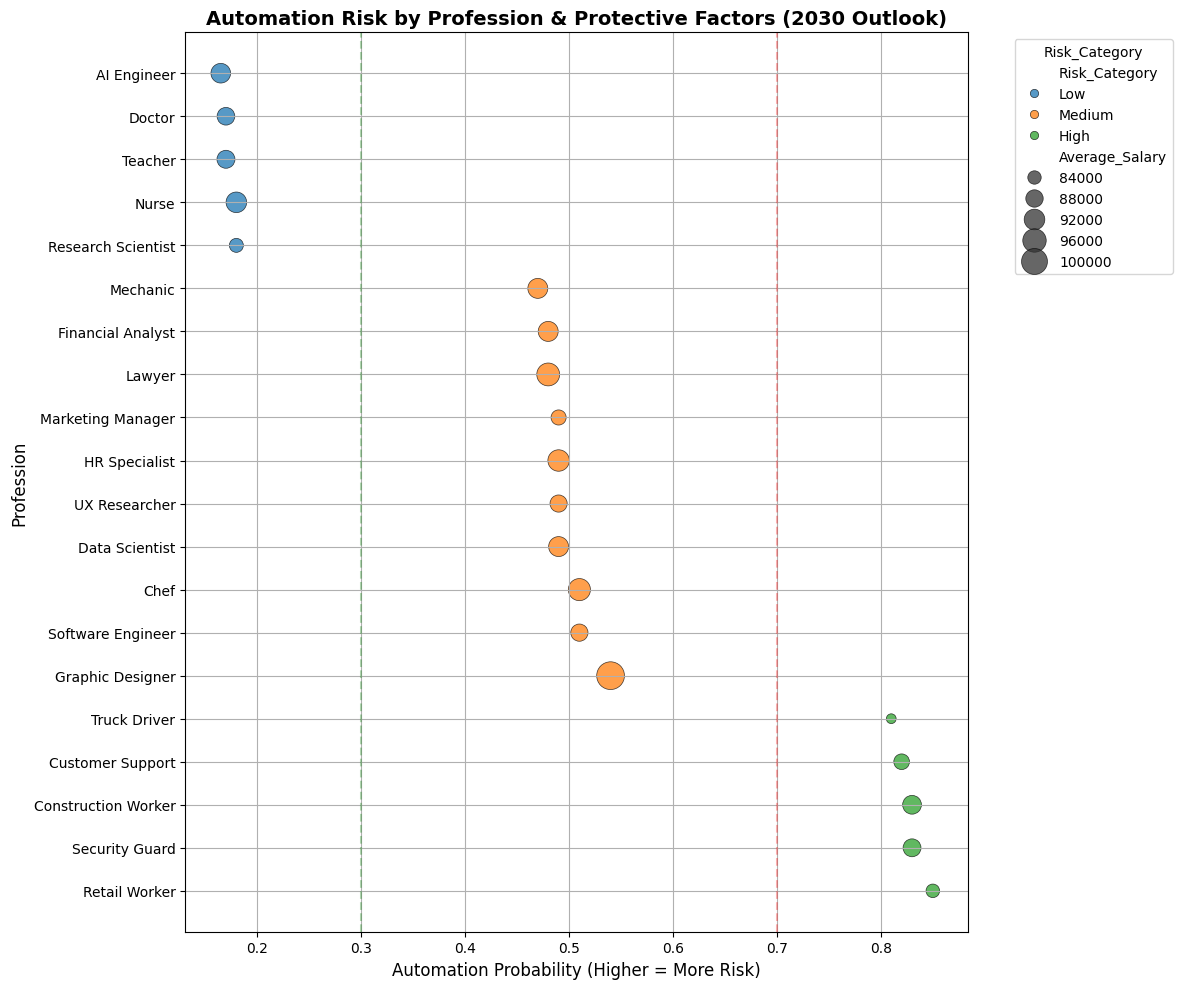

In [65]:
plt.figure(figsize = (12, 10))

sns.scatterplot(
    data = job_summary,
    x="Automation_Probability_2030",
    y="Job_Title",
    hue = "Risk_Category",
    size = "Average_Salary",
    palette = "tab10",
    sizes = (50, 400),
    alpha = 0.75,
    edgecolor = "black",
    linewidth = 0.5
)


plt.title("Automation Risk by Profession & Protective Factors (2030 Outlook)",
          fontsize = 14, fontweight="bold")

plt.xlabel("Automation Probability (Higher = More Risk)", fontsize=12)
plt.ylabel("Profession", fontsize = 12)

plt.legend(
    title = "Risk_Category",
    bbox_to_anchor = (1.05, 1),
    loc = "upper left",
    fontsize = 10
)

plt.axvline(
    x= 0.3,
    color = "green",
    linestyle = "--",
    alpha=0.3,
    label = "Low Risk Threshold",
)

plt.axvline(
    x=0.7,
    color = "red",
    linestyle = "--",
    alpha = 0.3,
    label = "High Risk Threshold"
)


plt.grid(True)



plt.tight_layout()
plt.show()